# Уменьшение палитры изображения 

Для этого выделим **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Рассмотрим число кластеров K = 2, 3, 10, 20 


In [30]:
import matplotlib.pyplot as plt
import cv2 

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

In [31]:
def draw_picture2(image, bgr=False):
    r, g, b = cv2.split(image) 
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

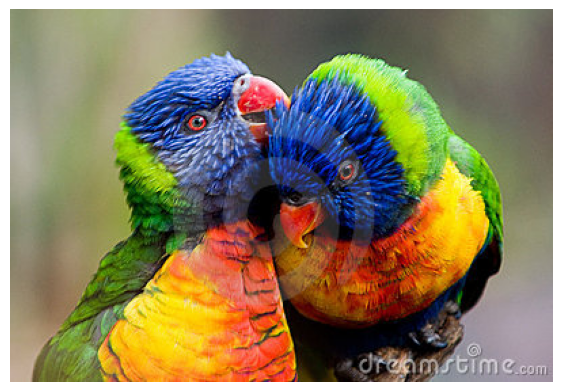

In [32]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [33]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(275, 400, 3)


Так как Агломеративная кластеризация не может обучиться на картинке такого размера, то уменьшим ее вдвое

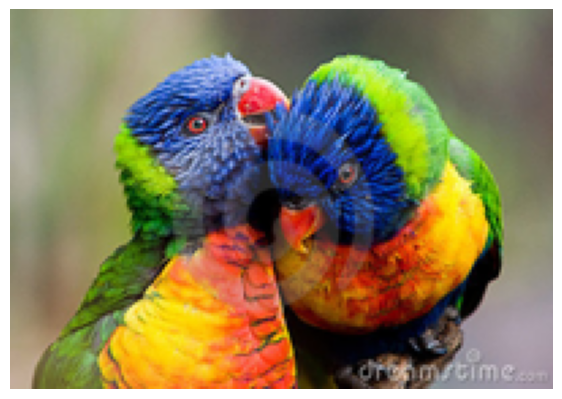

In [34]:
from PIL import Image
import numpy as np

img_small = Image.open("birds.jpg")
img_small = img_small.resize((200, 140))
img_small = np.array(img_small)
draw_picture2(img_small)

# KMeans

Число кластеров = 2
SSIM =  0.49764837653106153


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\1129361240.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img, result_image, multichannel=True)


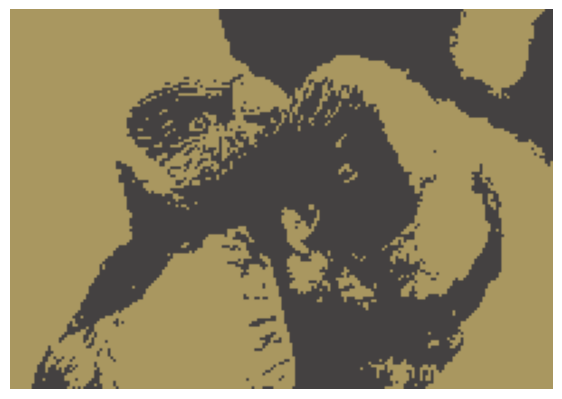

Число кластеров = 3
SSIM =  0.5426000239561234


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\1129361240.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img, result_image, multichannel=True)


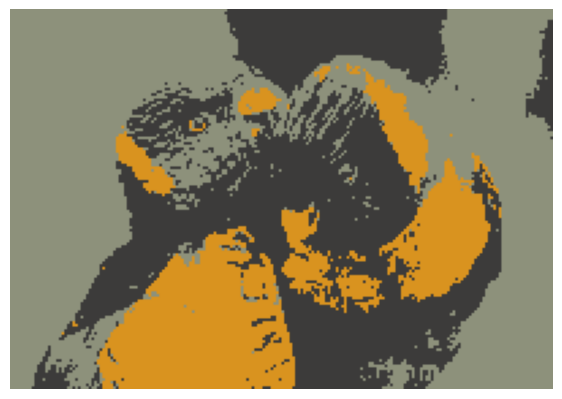

Число кластеров = 10
SSIM =  0.6690450432323992


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\1129361240.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img, result_image, multichannel=True)


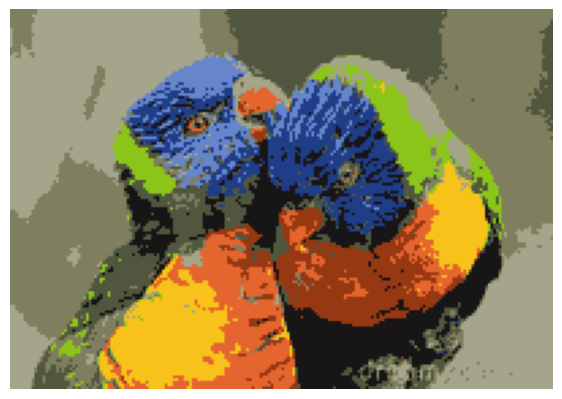

Число кластеров = 20
SSIM =  0.767898124758647


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\1129361240.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img, result_image, multichannel=True)


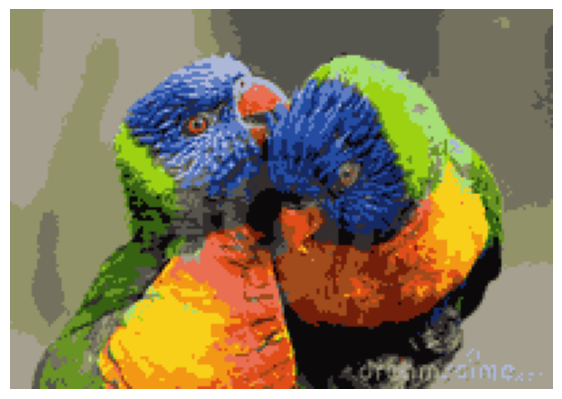

In [35]:
from sklearn.cluster import KMeans
from skimage.metrics import structural_similarity as ssim

X = img_small.reshape((-1,3)).astype(np.float32)
clust = [2,3,10,20]
km = []

def kmeans_metod(k, X, img):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(X)
    center = kmeans.cluster_centers_
    center = np.uint8(center)
    label = kmeans.labels_
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    t = ssim(img, result_image, multichannel=True)
    print("SSIM = ", t)
    draw_picture2(result_image)
    km.append(t)
    
for k in clust:
    print("Число кластеров =", k)
    kmeans_metod(k, X, img_small)

# DBSCAN

eps = 0.1
min_samples = 2
SSIM =  0.19667101342772886


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\467164916.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img, pic, multichannel=True)


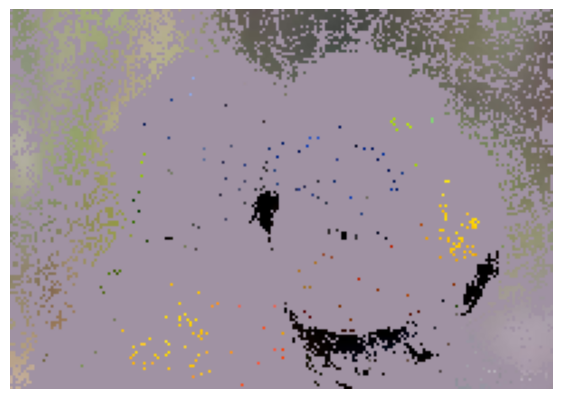

eps = 1
min_samples = 2
SSIM =  0.28866594244193616


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\467164916.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img, pic, multichannel=True)


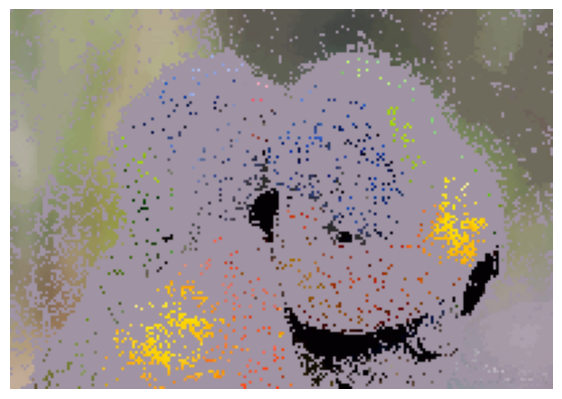

eps = 2
min_samples = 2
SSIM =  0.37954328745365745


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\467164916.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img, pic, multichannel=True)


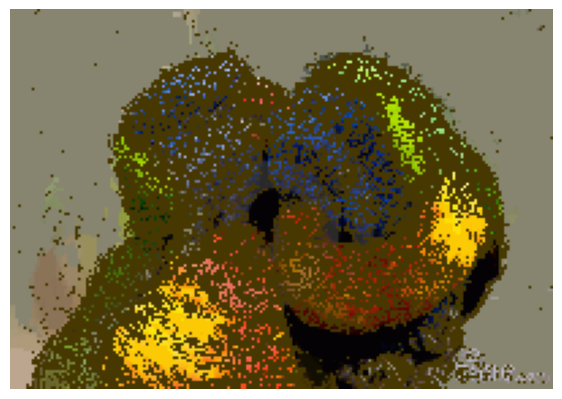

eps = 3
min_samples = 2
SSIM =  0.5688853290813215


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\467164916.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img, pic, multichannel=True)


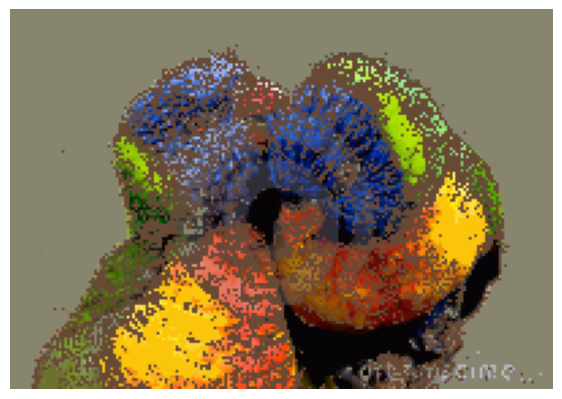

In [36]:
from sklearn.cluster import DBSCAN
X = img_small.reshape((-1,3)).astype(np.float32)

def DBSCAN_metod(e, m, X, img):
    pic = []
    dbscan = DBSCAN(eps=e, min_samples=m).fit(X)
    label = dbscan.labels_
    for i in np.unique(label)[1:]:
        pic.append(np.mean(X[i==label], axis=0))
    pic = np.array(pic)
    pic = np.uint8(pic)
    pic = pic[label.flatten()]
    pic = pic.reshape(img.shape)
    t = ssim(img, pic, multichannel=True)
    print("eps =", e)
    print("min_samples =", m)
    print("SSIM = ", t)
    draw_picture2(pic)
    
eps = [0.1, 1, 2, 3]
for e in eps:
    DBSCAN_metod(e, 2, X, img_small)

# Agglomerative Clustering

C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\1936951272.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img_small, ac, multichannel=True)


Число кластеров = 2
SSIM = 0.41473082645366205


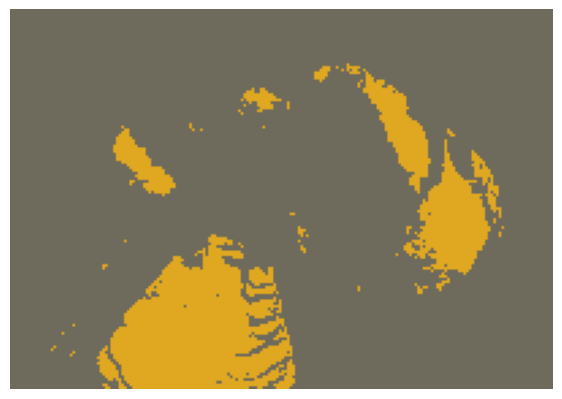

Число кластеров = 3
SSIM = 0.5207570500974196


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\1936951272.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img_small, ac, multichannel=True)


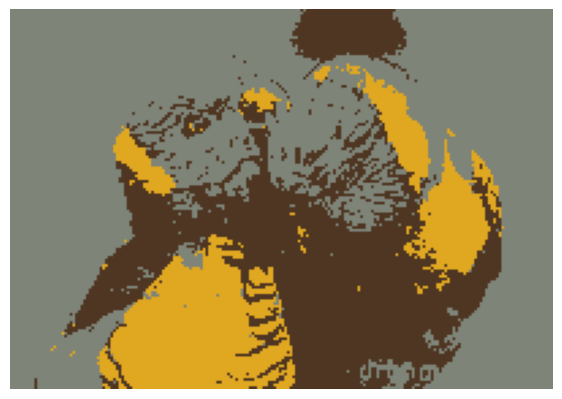

Число кластеров = 10
SSIM = 0.6233318117875987


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\1936951272.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img_small, ac, multichannel=True)


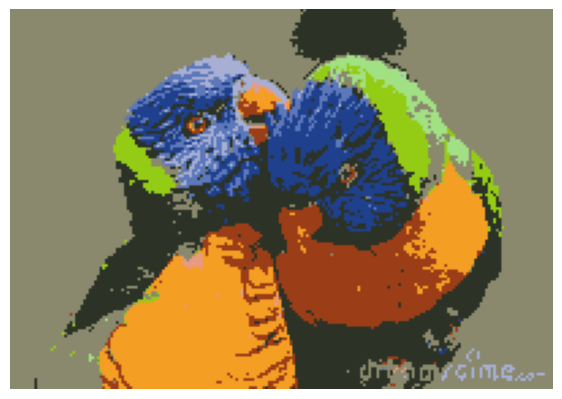

Число кластеров = 20
SSIM = 0.7056756510441066


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\1936951272.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img_small, ac, multichannel=True)


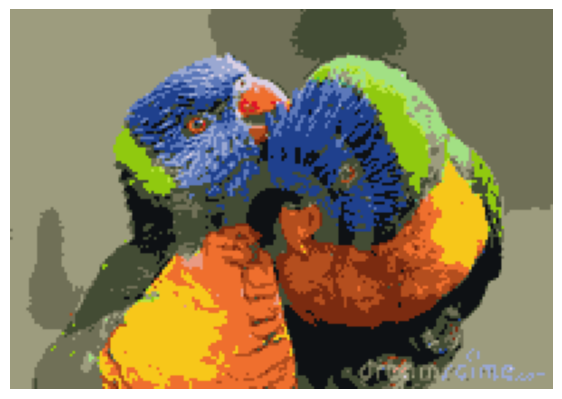

In [37]:
from sklearn.cluster import AgglomerativeClustering 
agl_ssim = []
X = img_small.reshape((-1,3)).astype(np.float32)

def agl_metod(n, img, img_small):
    agl = AgglomerativeClustering(n_clusters=n, linkage='average').fit(X)
    label = agl.labels_
    ac = []
    for i in np.unique(label):
        ac.append(np.mean(img[i==label], axis=0))
    ac = np.array(ac)
    ac = np.uint8(ac)
    ac = ac[label.flatten()]
    ac = ac.reshape(img_small.shape)
    t = ssim(img_small, ac, multichannel=True)
    print("Число кластеров =", n)
    print("SSIM =", t)
    draw_picture2(ac)
    agl_ssim.append(t)

for i in clust:
    agl_metod(i, X, img_small)

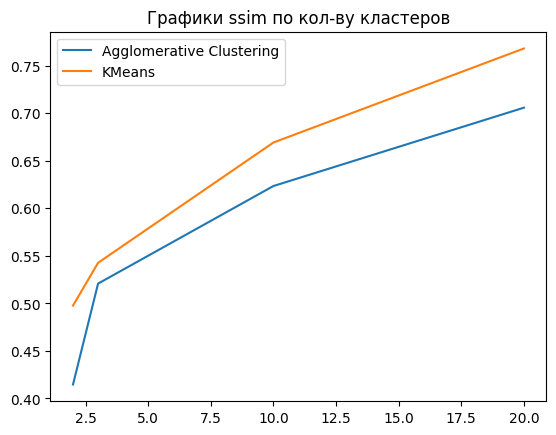

In [38]:
plt.plot(clust, agl_ssim, label = 'Agglomerative Clustering')
plt.plot(clust, km, label = 'KMeans')
plt.title("Графики ssim по кол-ву кластеров")
plt.legend()

# 2 - Пишем K-Means сами

Написать K-Means и сравнить с моделькой из под sklearn.

Задание оценивается в 5 баллов

In [39]:

class KMEANS:        
    def fit(self, X, k):
        self.centr = X[np.random.choice(len(X), k)]
        
        label = self.kmeans_label(X)
        new = self.move_centr(X, k, label)
        while not np.linalg.norm(new - self.centr) >= 0.01:
            label = self.kmeans_label(X)
            new = self.move_centr(X, k, label)
            self.centr = new
        return label, new
        
  
    def kmeans_label(self, X):
        return np.array([np.argmin(np.linalg.norm(x - self.centr, axis=1)) for x in X])
    
    def move_centr(self, X, k, label):
        new_centr = np.zeros_like(self.centr)
        for i in range(k):
            cluster = X[label == i]
            new_centr[i] = np.mean(cluster, axis=0)
        return new_centr


Число кластеров = 2
SSIM =  0.37569197107450925


C:\Users\sav4u\AppData\Local\Temp\ipykernel_1888\2356263542.py:8: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  t = ssim(img_small, result_image, multichannel=True)


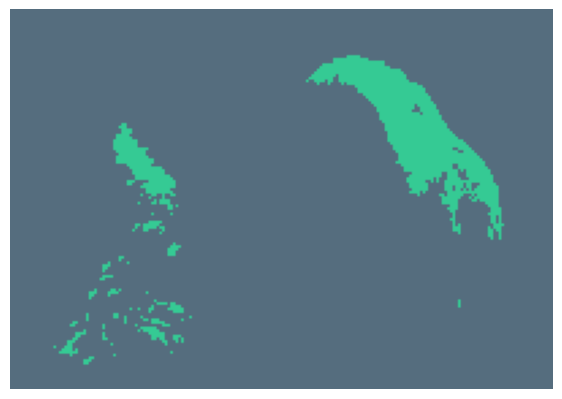

Число кластеров = 3
SSIM =  0.5209441522574906


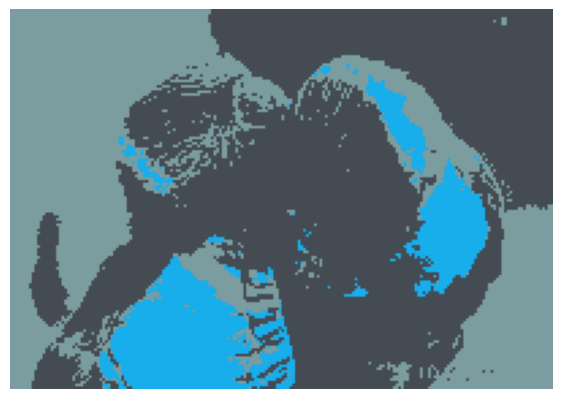

Число кластеров = 10
SSIM =  0.6367539913101972


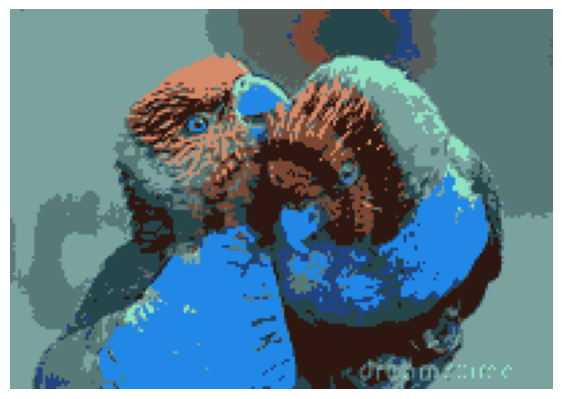

Число кластеров = 20
SSIM =  0.7011460555327881


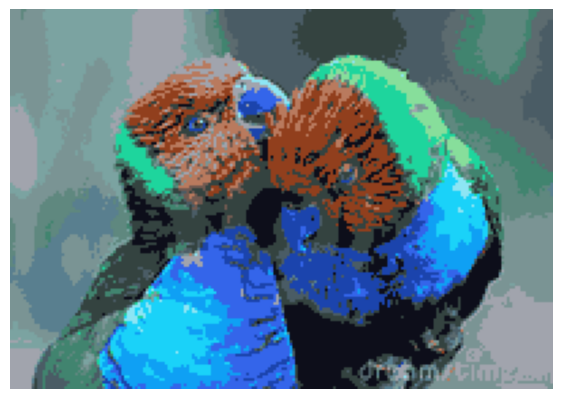

In [42]:
kmeans = KMEANS()
my_km = []
for k in clust:
    l, c = kmeans.fit(X, k)
    c = np.uint8(c)
    res = c[l.flatten()]
    result_image = res.reshape((img_small.shape))
    t = ssim(img_small, result_image, multichannel=True)
    print("Число кластеров =", k)
    print("SSIM = ", t)
    draw_picture(result_image)
    my_km.append(t)

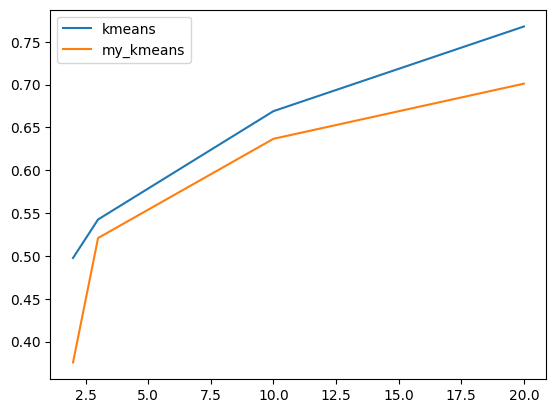

In [43]:
plt.plot(clust, km, label='kmeans')
plt.plot(clust, my_km, label = 'my_kmeans')
plt.legend()

# 3 - Пишем DBSCAN сами (дополнительное задание на 5 баллов)

Аналогично предыдудщему заданию